### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [35]:
# Installing the libraries with the specified version.
pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user




**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [36]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)


## Loading the dataset

In [37]:
# Load the dataset
file_path = '../../sampledata/week7/Loan_Modelling.csv'
main_data = pd.read_csv(file_path)

data = main_data.copy()
# Display the first few rows of the dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Data Overview

### Observations


In [38]:
from IPython.display import display

# Display basic information about the dataset
print("Basic Information about the dataset:")
data.info()


Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [39]:
from IPython.display import display

# Display summary statistics of the dataset in a better format
print("\nSummary Statistics of the dataset:")
display(data.describe())


Summary Statistics of the dataset:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Sanity Checks

In [40]:

# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.any() else "***No missing values found***")
## NO MISSING VALUES FOUND



Missing values in the dataset:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
***No missing values found***


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Main EDA to answer Key Questions

Text(0, 0.5, 'Frequency')

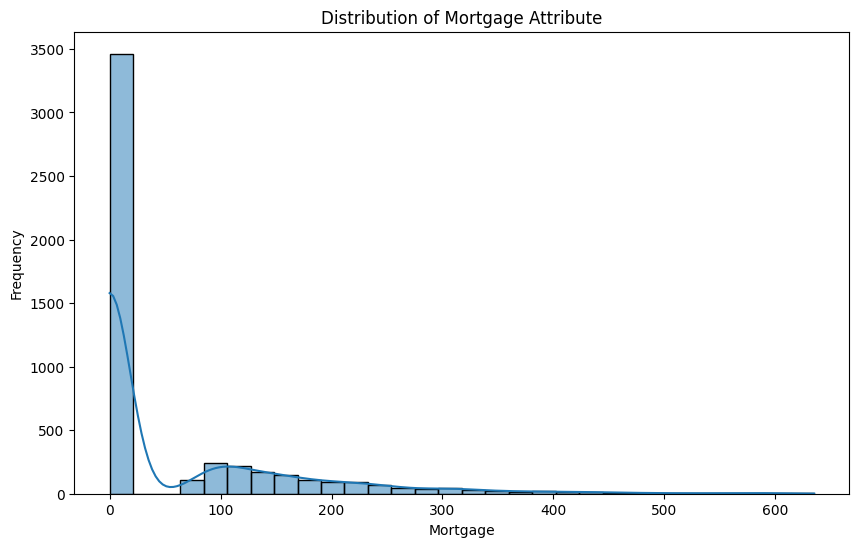

In [41]:
# 1. Distribution of mortgage attribute
plt.figure(figsize=(10, 6))
sns.histplot(data['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage Attribute')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')



In [42]:

# 2. Number of customers with credit cards
num_customers_with_credit_cards = data['CreditCard'].sum()
print(f"Number of customers with credit cards: {num_customers_with_credit_cards}")


Number of customers with credit cards: 1470


Attributes with strong correlation with the target attribute (Personal Loan):
Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode              -0.002974
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal_Loan, dtype: float64


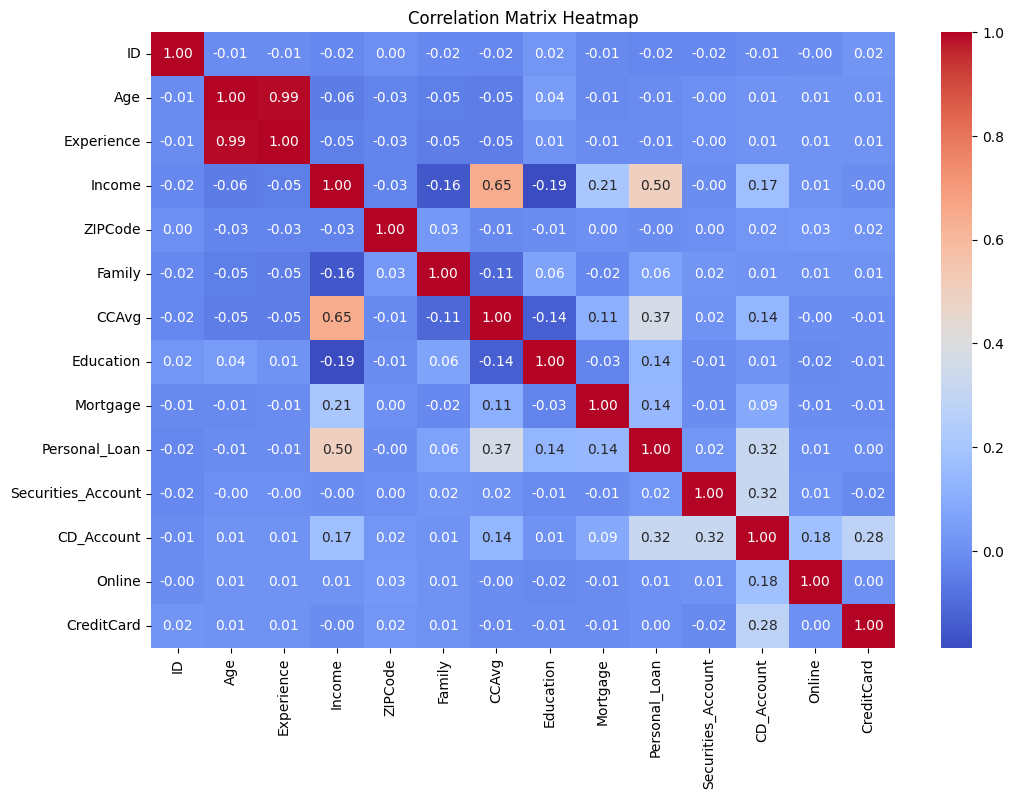

In [43]:

# 3. Attributes with strong correlation with the target attribute (personal loan)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
# Summarize the strong correlations
strong_correlations = correlation_matrix['Personal_Loan'].sort_values(ascending=False)
print("Attributes with strong correlation with the target attribute (Personal Loan):")
print(strong_correlations)
plt.show()

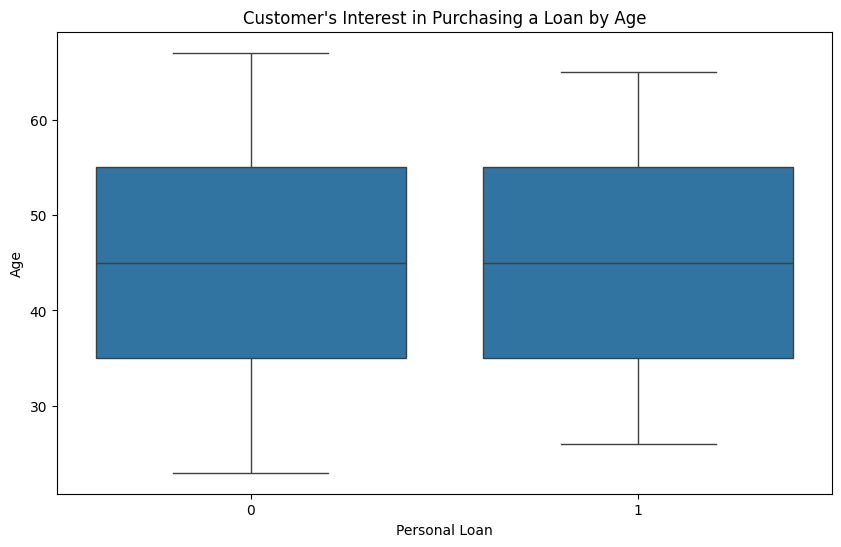

In [44]:

# 4. Customer's interest in purchasing a loan by age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Age', data=data)
plt.title("Customer's Interest in Purchasing a Loan by Age")
plt.xlabel('Personal Loan')
plt.ylabel('Age')
plt.show()


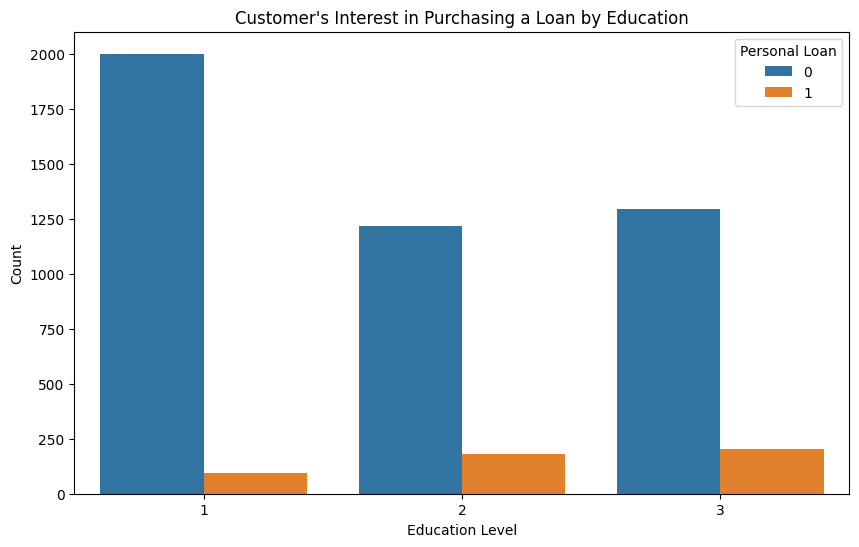

In [45]:

# 5. Customer's interest in purchasing a loan by education
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Personal_Loan', data=data)
plt.title("Customer's Interest in Purchasing a Loan by Education")
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

### Comprehensive Exploratory Data Analysis (EDA)

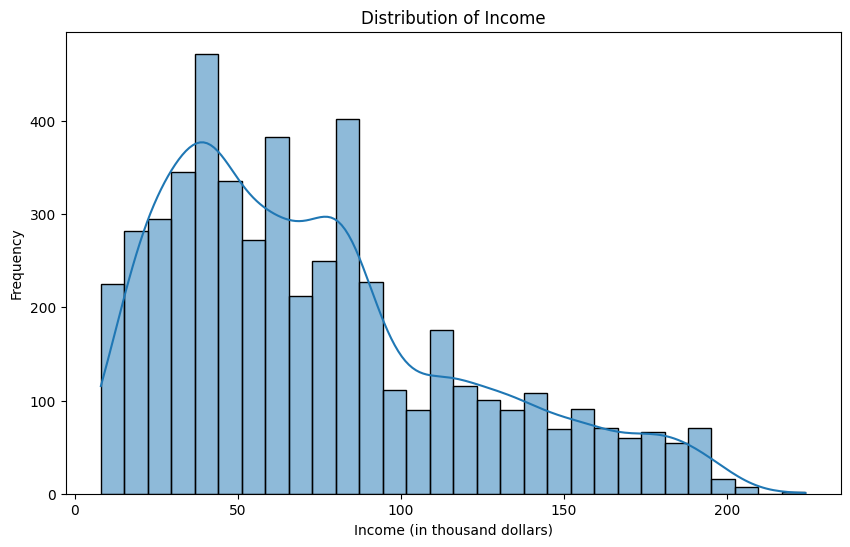

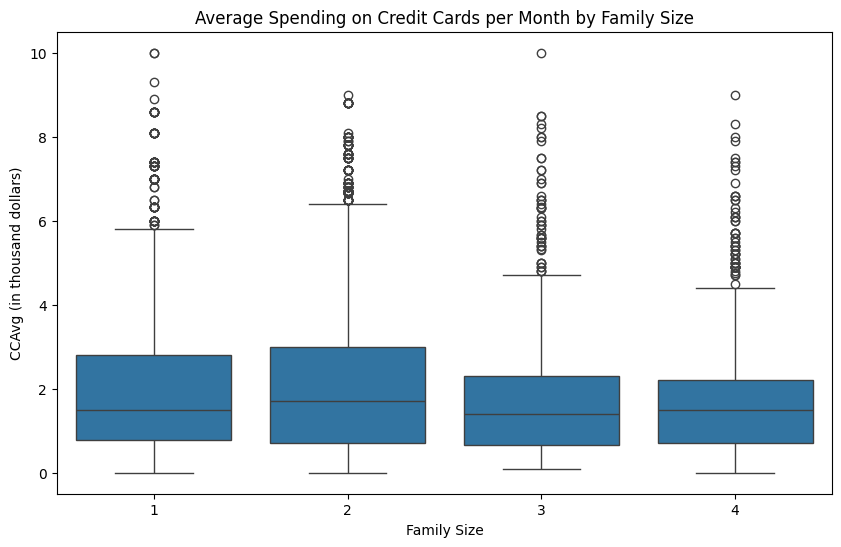

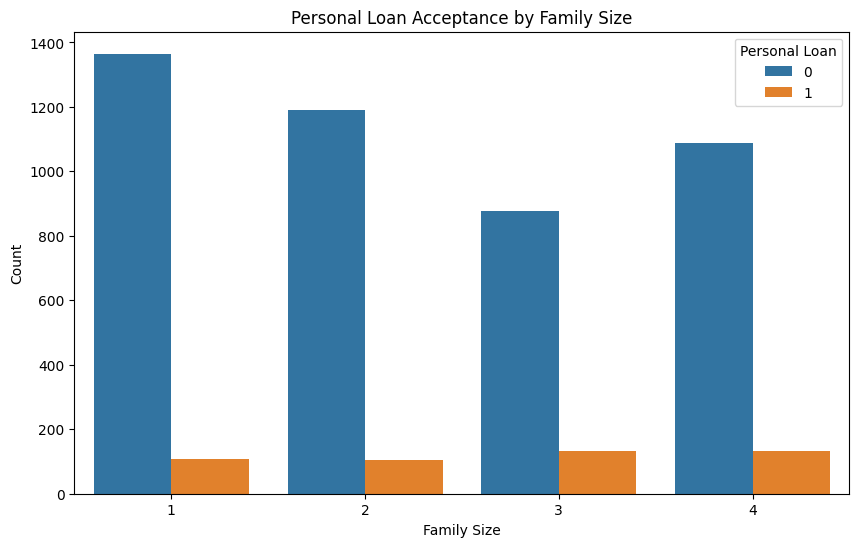

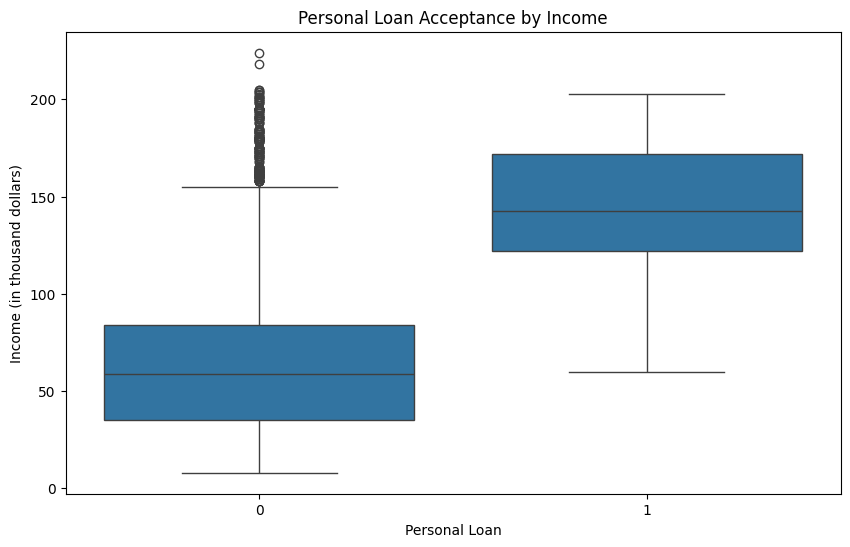

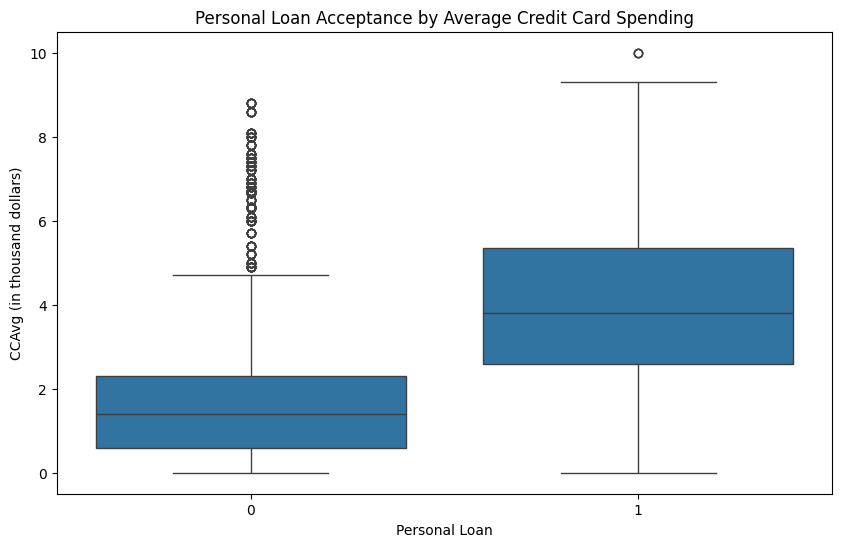

In [46]:

# 6. Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income (in thousand dollars)')
plt.ylabel('Frequency')
plt.show()

# 7. Average spending on credit cards per month (CCAvg) by family size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family', y='CCAvg', data=data)
plt.title('Average Spending on Credit Cards per Month by Family Size')
plt.xlabel('Family Size')
plt.ylabel('CCAvg (in thousand dollars)')
plt.show()

# 8. Personal loan acceptance by family size
plt.figure(figsize=(10, 6))
sns.countplot(x='Family', hue='Personal_Loan', data=data)
plt.title('Personal Loan Acceptance by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

# 9. Personal loan acceptance by income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Income', data=data)
plt.title('Personal Loan Acceptance by Income')
plt.xlabel('Personal Loan')
plt.ylabel('Income (in thousand dollars)')
plt.show()

# 10. Personal loan acceptance by average credit card spending (CCAvg)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='CCAvg', data=data)
plt.title('Personal Loan Acceptance by Average Credit Card Spending')
plt.xlabel('Personal Loan')
plt.ylabel('CCAvg (in thousand dollars)')
plt.show()

## Data Preprocessing

### Check Invalid Data

In [47]:
binary_columns = ['Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

In [48]:

# 1. Check for invalid Age values
invalid_age = data[data['Age'] <= 0]
if invalid_age.empty:
    print("No invalid Age values found.")
else:
    print(f"Invalid Age values count: {invalid_age.shape[0]}")
    print("Unique invalid Age values:", invalid_age['Age'].unique())

# 2. Check for invalid Experience values
invalid_experience = data[(data['Experience'] < 0) | (data['Experience'] > data['Age'])]
if invalid_experience.empty:
    print("\nNo invalid Experience values found.")
else:
    print(f"\nInvalid Experience values count: {invalid_experience.shape[0]}")
    print("Unique invalid Experience values:", invalid_experience['Experience'].unique())
    print("Count of unique invalid Experience values:")
    print(invalid_experience['Experience'].value_counts())

# 3. Check for invalid Income values
invalid_income = data[data['Income'] <= 0]
if invalid_income.empty:
    print("\nNo invalid Income values found.")
else:
    print(f"\nInvalid Income values count: {invalid_income.shape[0]}")
    print("Unique invalid Income values:", invalid_income['Income'].unique())

# 4. Check for invalid Family size values
invalid_family = data[data['Family'] <= 0]
if invalid_family.empty:
    print("\nNo invalid Family size values found.")
else:
    print(f"\nInvalid Family size values count: {invalid_family.shape[0]}")
    print("Unique invalid Family size values:", invalid_family['Family'].unique())

# 5. Check for invalid Education values
invalid_education = data[~data['Education'].isin([1, 2, 3])]
if invalid_education.empty:
    print("\nNo invalid Education values found.")
else:
    print(f"\nInvalid Education values count: {invalid_education.shape[0]}")
    print("Unique invalid Education values:", invalid_education['Education'].unique())

# 6. Check for invalid Mortgage values
invalid_mortgage = data[data['Mortgage'] < 0]
if invalid_mortgage.empty:
    print("\nNo invalid Mortgage values found.")
else:
    print(f"\nInvalid Mortgage values count: {invalid_mortgage.shape[0]}")
    print("Unique invalid Mortgage values:", invalid_mortgage['Mortgage'].unique())

# 7. Check for invalid binary values (Personal_Loan, Securities_Account, CD_Account, Online, CreditCard)
invalid_binary = data[~data[binary_columns].isin([0, 1]).all(axis=1)]
if invalid_binary.empty:
    print("\nNo invalid binary values found.")
else:
    print(f"\nInvalid binary values count: {invalid_binary.shape[0]}")
    for column in binary_columns:
        print(f"Unique invalid values in {column}:", invalid_binary[column].unique())


No invalid Age values found.

Invalid Experience values count: 52
Unique invalid Experience values: [-1 -2 -3]
Count of unique invalid Experience values:
Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

No invalid Income values found.

No invalid Family size values found.

No invalid Education values found.

No invalid Mortgage values found.

No invalid binary values found.


### Fix Invalid data and Data Types

In [49]:
# Calculate the mean Experience for each Age group
# Make all negative Experience values positive
data['Experience'] = data['Experience'].abs()


In [50]:
# Convert categorical variables to category data type
categorical_columns = ['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Personal_Loan']

for column in categorical_columns:
    data[column] = data[column].astype('category')

# Verify the changes
print(data.dtypes)

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIPCode                  int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object


### Feature Engineering

#### ZIP Code

In [51]:
# Extract the first two digits of the ZIP code
data['ZIPCode_Prefix'] = data['ZIPCode'].astype(str).str[:2]

# Drop the original ZIP code column
data = data.drop(columns=['ZIPCode'])

# Convert the ZIPCode_Prefix to numeric if needed
data['ZIPCode_Prefix'] = data['ZIPCode_Prefix'].astype("category")


#### Correlation with Personal Loan Attributes

Attributes with strong correlation with the target attribute (Personal Loan):
Personal_Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD_Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities_Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIPCode_Prefix       -0.000607
Age                  -0.007726
Experience           -0.008304
ID                   -0.024801
Name: Personal_Loan, dtype: float64


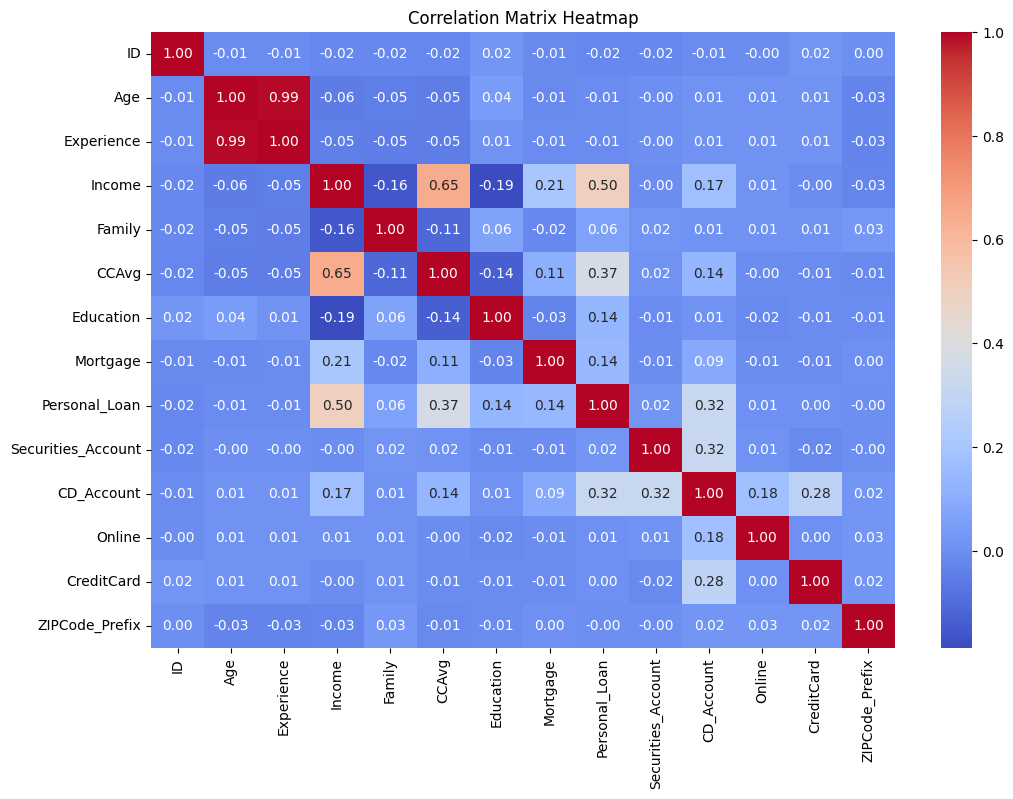

In [52]:
# 3. Attributes with strong correlation with the target attribute (personal loan)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
# Summarize the strong correlations
strong_correlations = correlation_matrix['Personal_Loan'].sort_values(ascending=False)
print("Attributes with strong correlation with the target attribute (Personal Loan):")
print(strong_correlations)
plt.show()

#### Drop unnecessary columns

In [53]:

# Preparing data for modeling
# Dropping the ID column as it is not useful for modeling
data = data.drop(columns=['ID'])


### Prepare the Train and Test Data

In [54]:

#data['CCAvg'] = (data['CCAvg'] * 10).astype(int)



# Splitting the data into features and target variable
X = data.drop(columns=['Personal_Loan'])
y = data['Personal_Loan']




# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## Model Building

### Model Evaluation Criterion

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test,model_name):
    """
    Evaluate the performance of a model and print the classification report and accuracy score.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    
    print(f"Model: {model.__class__.__name__+' :' + model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    
    report_df = pd.DataFrame(report).transpose()
    display(report_df)
    
    return y_pred

def plot_confusion_matrix(y_test, y_pred, model_name):
    """
    Plot the confusion matrix for the given true and predicted labels.
    """
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    cm_display = np.array([["{0:.0f}\n({1:.1f}%)".format(value, percent) for value, percent in zip(row, row_percent)] for row, row_percent in zip(cm, cm_percent)])
    plt.figure(figsize=(4, 2))
    sns.heatmap(cm, annot=cm_display, fmt='', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Example usage:
# y_pred = evaluate_model(logistic_regression, X_test, y_test)
# plot_confusion_matrix(y_test, y_pred, logistic_regression.__class__.__name__)

### Model Building

In [56]:
decision_tree = DecisionTreeClassifier(criterion="gini", random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Model: DecisionTreeClassifier :Decision Tree(Default)
Accuracy: 0.9787
Classification Report:


,precision,recall,f1-score,support
0,0.987361,0.988831,0.988095,1343.000000
1,0.903226,0.891720,0.897436,157.000000
accuracy,0.978667,0.978667,0.978667,0.978667
macro avg,0.945293,0.940275,0.942766,1500.000000
weighted avg,0.978554,0.978667,0.978606,1500.000000


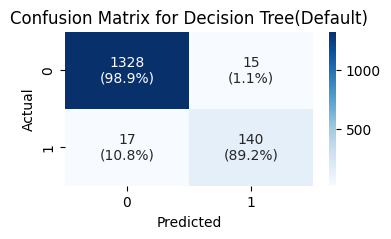

In [57]:
# Evaluate the Decision Tree model
y_pred_dt = evaluate_model(decision_tree, X_test, y_test, 'Decision Tree(Default)')
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree(Default)')


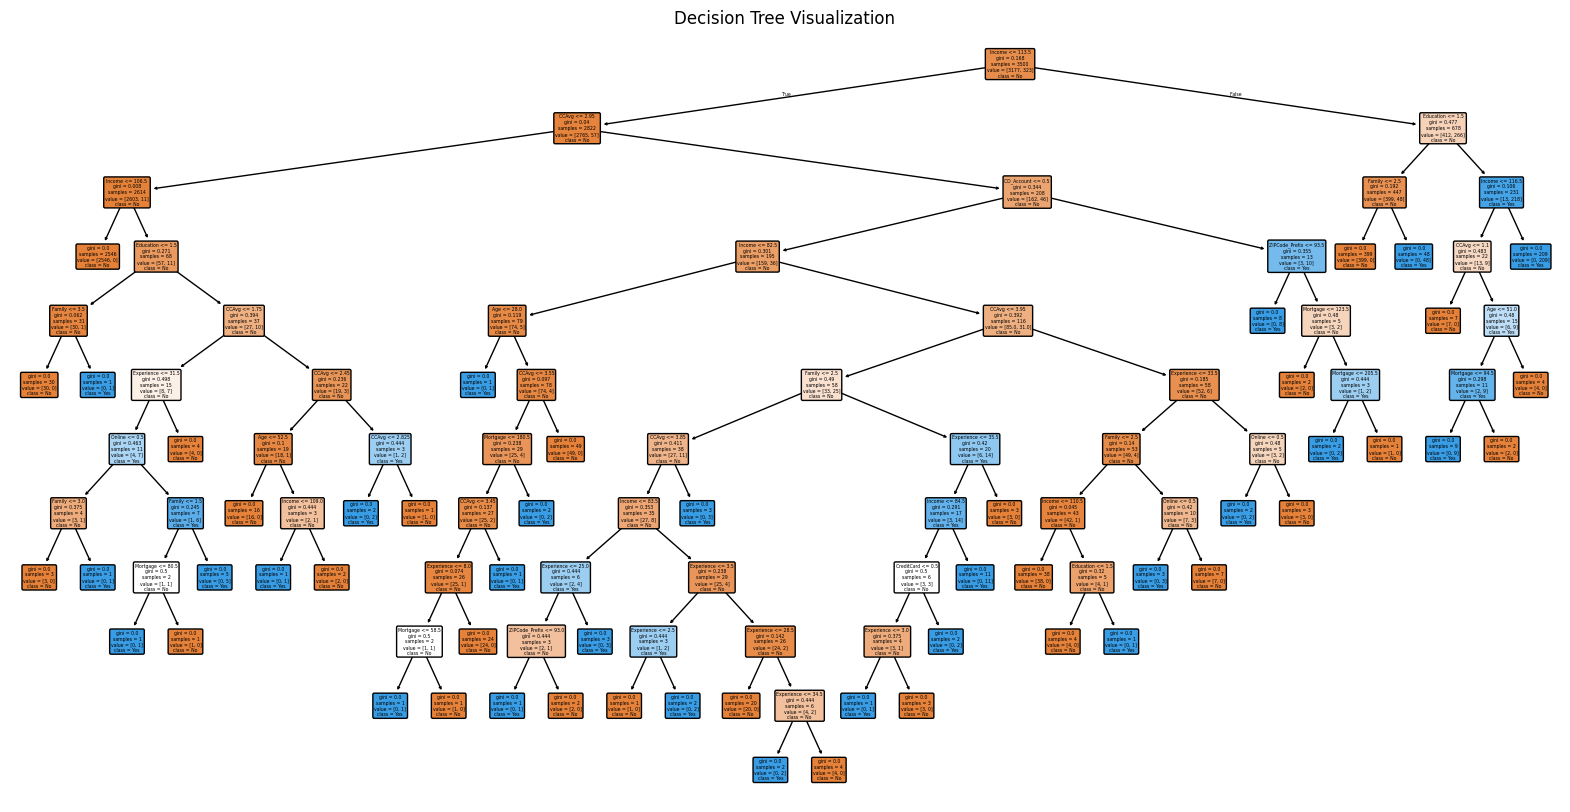

In [58]:
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

## Model Performance Improvement

### Pre-Pruned Decision Tree

Model: DecisionTreeClassifier :Decision Tree(Pre-Pruned)
Accuracy: 0.9807
Classification Report:


,precision,recall,f1-score,support
0,0.992504,0.985853,0.989167,1343.000000
1,0.885542,0.936306,0.910217,157.000000
accuracy,0.980667,0.980667,0.980667,0.980667
macro avg,0.939023,0.961079,0.949692,1500.000000
weighted avg,0.981308,0.980667,0.980904,1500.000000


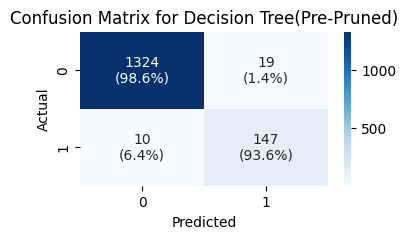

In [59]:
# Decision Tree with Pre-Pruning and adjusted class weight for higher recall
pruned_decision_tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight={0: 1, 1: 3},  # Adjusting class weight to increase recall
    random_state=42
)
pruned_decision_tree.fit(X_train, y_train)

# Evaluate the pruned Decision Tree model
y_pred_pruned_dt = evaluate_model(pruned_decision_tree, X_test, y_test,'Decision Tree(Pre-Pruned)')
plot_confusion_matrix(y_test, y_pred_pruned_dt, 'Decision Tree(Pre-Pruned)')

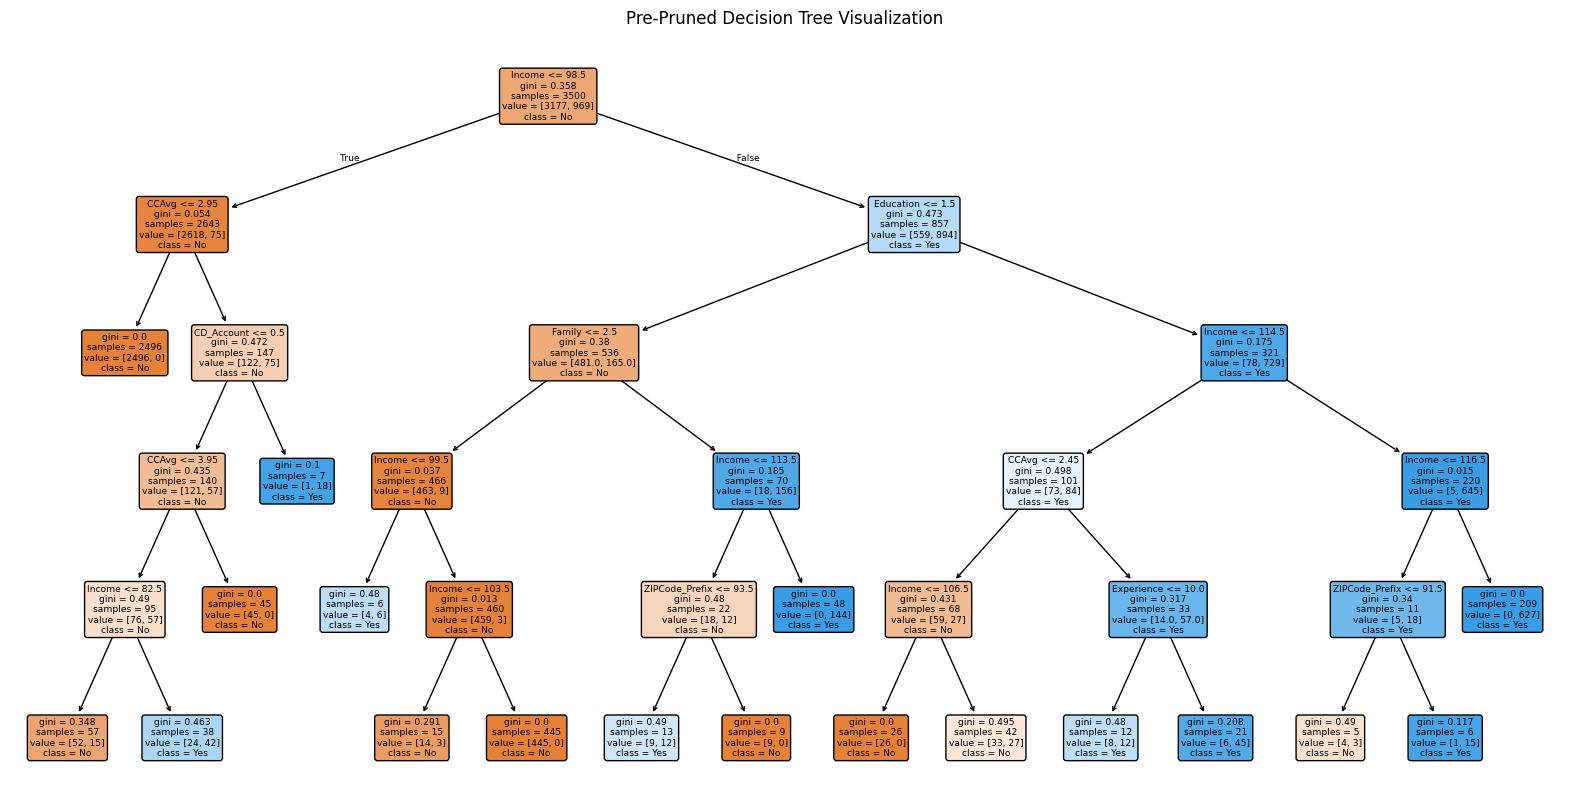

In [60]:
plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Pre-Pruned Decision Tree Visualization')
plt.show()

### Post-Pruned Decision Tree

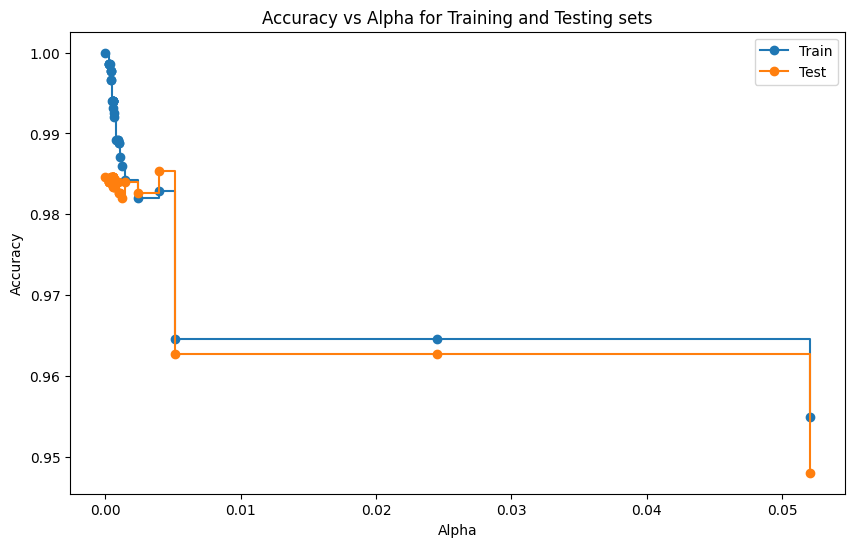

Best alpha: 0.003971552257266543


In [61]:
# Perform cost complexity pruning
path = decision_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Create an array to store the decision trees for each alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha, class_weight={0: 1, 1: 3})
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate the decision trees and find the best alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plot the training and testing scores
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle="steps-post")
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha for Training and Testing sets')
plt.legend()
plt.show()

# Find the best alpha value
best_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Best alpha: {best_alpha}")


Model: DecisionTreeClassifier :Decision Tree(Post Pruned)
Accuracy: 0.9853
Classification Report:


,precision,recall,f1-score,support
0,0.988174,0.995532,0.991840,1343.000000
1,0.959184,0.898089,0.927632,157.000000
accuracy,0.985333,0.985333,0.985333,0.985333
macro avg,0.973679,0.946811,0.959736,1500.000000
weighted avg,0.985140,0.985333,0.985119,1500.000000


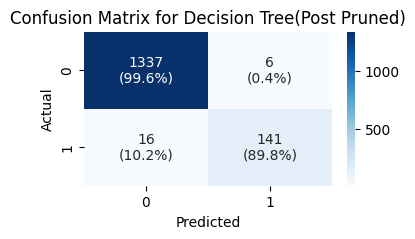

In [62]:

# Train the final decision tree with the best alpha and adjusted class weight
post_pruned_decision_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha, class_weight={0: 1, 1: 3})
post_pruned_decision_tree.fit(X_train, y_train)

# Evaluate the pruned decision tree
y_pred_pruned_dt = evaluate_model(post_pruned_decision_tree, X_test, y_test,'Decision Tree(Post Pruned)')
plot_confusion_matrix(y_test, y_pred_pruned_dt, 'Decision Tree(Post Pruned)')

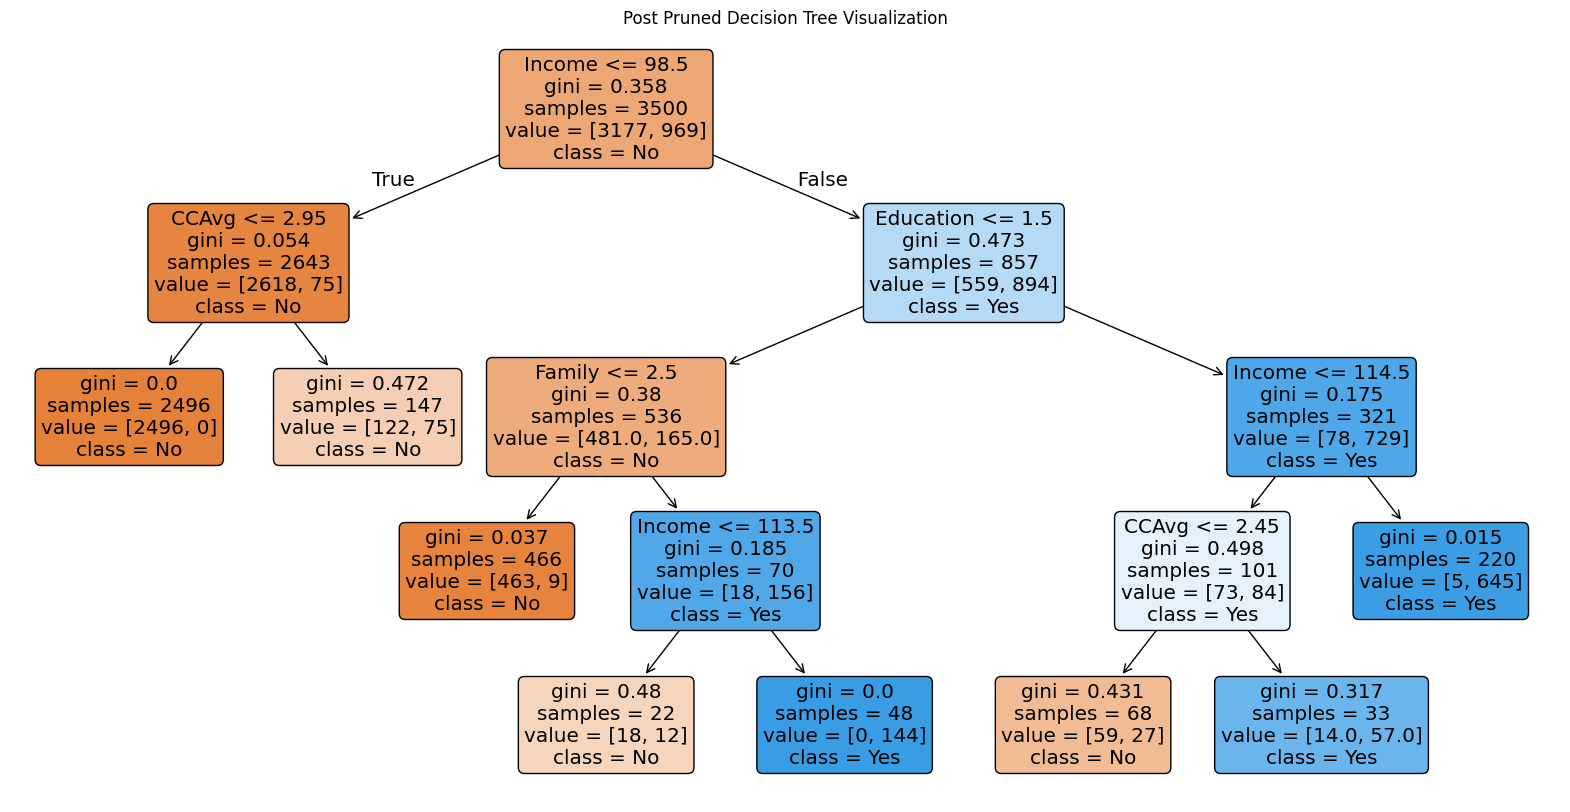

In [63]:
plt.figure(figsize=(20, 10))
tree.plot_tree(post_pruned_decision_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.title('Post Pruned Decision Tree Visualization')
plt.show()

## Model Performance Comparison and Final Model Selection

Evaluating Decision Tree...
Model: DecisionTreeClassifier :Decision Tree
Accuracy: 0.9787
Classification Report:


,precision,recall,f1-score,support
0,0.987361,0.988831,0.988095,1343.000000
1,0.903226,0.891720,0.897436,157.000000
accuracy,0.978667,0.978667,0.978667,0.978667
macro avg,0.945293,0.940275,0.942766,1500.000000
weighted avg,0.978554,0.978667,0.978606,1500.000000


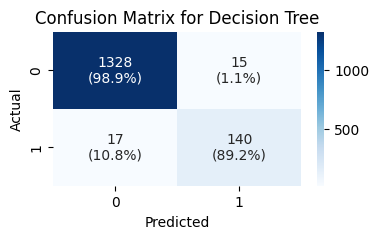

Evaluating Pre-Pruned Decision Tree...
Model: DecisionTreeClassifier :Pre-Pruned Decision Tree
Accuracy: 0.9807
Classification Report:


,precision,recall,f1-score,support
0,0.992504,0.985853,0.989167,1343.000000
1,0.885542,0.936306,0.910217,157.000000
accuracy,0.980667,0.980667,0.980667,0.980667
macro avg,0.939023,0.961079,0.949692,1500.000000
weighted avg,0.981308,0.980667,0.980904,1500.000000


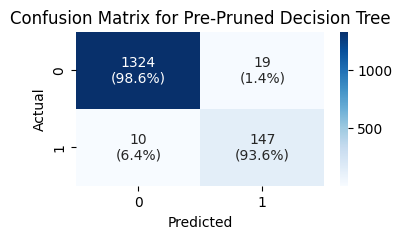

Evaluating Post-Pruned Decision Tree...
Model: DecisionTreeClassifier :Post-Pruned Decision Tree
Accuracy: 0.9853
Classification Report:


,precision,recall,f1-score,support
0,0.988174,0.995532,0.991840,1343.000000
1,0.959184,0.898089,0.927632,157.000000
accuracy,0.985333,0.985333,0.985333,0.985333
macro avg,0.973679,0.946811,0.959736,1500.000000
weighted avg,0.985140,0.985333,0.985119,1500.000000


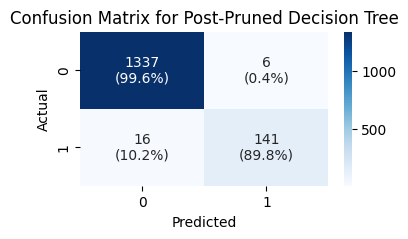

In [64]:
# Define the models to compare
models = [
    ("Decision Tree", decision_tree),
    ("Pre-Pruned Decision Tree", pruned_decision_tree),
    ("Post-Pruned Decision Tree", post_pruned_decision_tree)
]

# Dictionary to store the evaluation results
results = {}

# Evaluate each model
for model_name, model in models:
    print(f"Evaluating {model_name}...")
    y_pred = evaluate_model(model, X_test, y_test,model_name)
    plot_confusion_matrix(y_test, y_pred, model_name)
    results[model_name] = {
        "Model Name": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }


#### SELECTED MODEL : Pre-Pruned Decision Tree

In [65]:

# Display the results
print("\nModel Comparison:")
comparison_df = pd.DataFrame(results).T
display(comparison_df)


Model Comparison:


,Model Name,Accuracy,Precision,Recall,F1 Score
Decision Tree,Decision Tree,0.978667,0.903226,0.89172,0.897436
Pre-Pruned Decision Tree,Pre-Pruned Decision Tree,0.980667,0.885542,0.936306,0.910217
Post-Pruned Decision Tree,Post-Pruned Decision Tree,0.985333,0.959184,0.898089,0.927632


In [66]:
# Get feature importances from the Pre-Pruned Decision Tree
feature_importances = pruned_decision_tree.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances in Pre-Pruned Decision Tree:")
display(feature_importances_df)

Feature Importances in Pre-Pruned Decision Tree:


,Feature,Importance
2,Income,0.554446
5,Education,0.222469
3,Family,0.144582
4,CCAvg,0.061937
8,CD_Account,0.009973
11,ZIPCode_Prefix,0.004901
1,Experience,0.001692
0,Age,0.000000
6,Mortgage,0.000000
7,Securities_Account,0.000000


#### CUSTOMER SEGMENTATION

In [67]:
# Predict the probability of accepting a personal loan for each customer in the dataset
data['Loan_Acceptance_Probability'] = pruned_decision_tree.predict_proba(X)[:, 1]

# Define segments based on the probability
def segment_customer(probability):
    if probability >= 0.75:
        return 'Highly Likely'
    elif probability >= 0.50:
        return 'Likely'
    elif probability >= 0.25:
        return 'Unlikely'
    else:
        return 'Highly Unlikely'

# Apply the segmentation function to the dataset
data['Customer_Segment'] = data['Loan_Acceptance_Probability'].apply(segment_customer)

# Display the first few rows of the segmented data
display(data[['Income', 'Education', 'Loan_Acceptance_Probability', 'Customer_Segment']].head())

# Group by customer segment and calculate the average income and education level
segment_summary = data.groupby('Customer_Segment').agg({
    'Income': 'median',
    'Education': lambda x: x.mode()[0],  # Most common education level
    'Loan_Acceptance_Probability': 'mean'
}).reset_index()

# Display the segment summary
print("\nCustomer Segment Summary:")
display(segment_summary)

,Income,Education,Loan_Acceptance_Probability,Customer_Segment
0,49,1,0.0,Highly Unlikely
1,34,1,0.0,Highly Unlikely
2,11,1,0.0,Highly Unlikely
3,100,2,0.6,Likely
4,45,2,0.0,Highly Unlikely



Customer Segment Summary:


,Customer_Segment,Income,Education,Loan_Acceptance_Probability
0,Highly Likely,150.0,3,0.988093
1,Highly Unlikely,58.0,1,0.005416
2,Likely,95.0,1,0.615883
3,Unlikely,113.0,3,0.447619


In [68]:
# Define high-risk and low-risk customer segments based on the probability threshold
high_risk_threshold = 0.25
low_risk_threshold = 0.75

# Identify high-risk customers (less likely to accept a loan)
high_risk_customers = data[data['Loan_Acceptance_Probability'] < high_risk_threshold]

# Identify low-risk customers (more likely to accept a loan)
low_risk_customers = data[data['Loan_Acceptance_Probability'] >= low_risk_threshold]

# Display the first few rows of high-risk and low-risk customers
print("High-Risk Customers (Less Likely to Accept a Loan):")
display(high_risk_customers.head())

print("\nLow-Risk Customers (More Likely to Accept a Loan):")
display(low_risk_customers.head())

# Summary statistics for high-risk and low-risk customers
high_risk_summary = high_risk_customers.describe()
low_risk_summary = low_risk_customers.describe()

print("\nSummary Statistics for High-Risk Customers:")
display(high_risk_summary)

print("\nSummary Statistics for Low-Risk Customers:")
display(low_risk_summary)

High-Risk Customers (Less Likely to Accept a Loan):


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_Prefix,Loan_Acceptance_Probability,Customer_Segment
0,25,1,49,4,1.6,1,0,0,1,0,0,0,91,0.0,Highly Unlikely
1,45,19,34,3,1.5,1,0,0,1,0,0,0,90,0.0,Highly Unlikely
2,39,15,11,1,1.0,1,0,0,0,0,0,0,94,0.0,Highly Unlikely
4,35,8,45,4,1.0,2,0,0,0,0,0,1,91,0.0,Highly Unlikely
5,37,13,29,4,0.4,2,155,0,0,0,1,0,92,0.0,Highly Unlikely



Low-Risk Customers (More Likely to Accept a Loan):


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_Prefix,Loan_Acceptance_Probability,Customer_Segment
9,34,9,180,1,8.9,3,0,1,0,0,0,0,93,1.000000,Highly Likely
12,48,23,114,2,3.8,3,0,0,1,0,0,0,93,0.882353,Highly Likely
16,38,14,130,4,4.7,3,134,1,0,0,0,0,95,1.000000,Highly Likely
18,46,21,193,2,8.1,3,0,1,0,0,0,0,91,1.000000,Highly Likely
29,38,13,119,1,3.3,2,0,1,0,1,1,1,94,1.000000,Highly Likely



Summary Statistics for High-Risk Customers:


,Age,Experience,Income,Family,CCAvg,Mortgage,Loan_Acceptance_Probability
count,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000,4411.000000
mean,45.382000,20.183859,65.281342,2.376105,1.709329,51.166856,0.005416
std,11.390147,11.340973,40.594594,1.147712,1.571225,91.104457,0.033705
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000
25%,36.000000,10.000000,35.000000,1.000000,0.600000,0.000000,0.000000
50%,45.000000,20.000000,58.000000,2.000000,1.400000,0.000000,0.000000
75%,55.000000,30.000000,83.000000,3.000000,2.200000,97.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,8.800000,635.000000,0.223881



Summary Statistics for Low-Risk Customers:


,Age,Experience,Income,Family,CCAvg,Mortgage,Loan_Acceptance_Probability
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,45.596811,20.384966,149.332574,2.610478,4.022073,106.722096,0.988093
std,11.642470,11.633476,28.661600,1.114856,2.128273,164.253313,0.033009
min,26.000000,0.000000,71.000000,1.000000,0.000000,0.000000,0.882353
25%,35.000000,10.000000,129.000000,2.000000,2.600000,0.000000,1.000000
50%,45.000000,20.000000,150.000000,3.000000,4.100000,0.000000,1.000000
75%,56.000000,30.000000,174.000000,4.000000,5.450000,203.500000,1.000000
max,65.000000,41.000000,203.000000,4.000000,10.000000,617.000000,1.000000


## Actionable Insights and Business Recommendations

Key Features Influencing Personal Loan Acceptance:

### Best performing model

**Pre-Pruned Decision Tree** is the best model for this use case because it improves the recall score. This means we don't miss opportunities for personal loans even if it means reaching out to a slightly higher number of uninterested customers.

The decision tree model highlights the most important features influencing whether a customer will accept a personal loan. These features include:
- **Income**: The most significant feature with an importance score of 0.554.
- **Education**: The second most important feature with an importance score of 0.222.
- **Family Size**: The third most important feature with an importance score of 0.145.
- **Average Credit Card Spending (CCAvg)**: With an importance score of 0.062.
- **CD Account**: With an importance score of 0.010.

Understanding these key features can help tailor marketing strategies to target customers who are more likely to accept a personal loan.

### Customer Segmentation:

The decision tree can be used to segment customers into different groups based on their likelihood of accepting a personal loan. For example:
- **Highly Likely**: Customers with a median income of USD 150k and education level 3 (Advanced/Professional).
- **Likely**: Customers with a median income of USD 95k and education level 1 (Undergrad).
- **Unlikely**: Customers with a median income of USD 113k and education level 3 (Advanced/Professional).
- **Highly Unlikely**: Customers with a median income of USD 58k and education level 1 (Undergrad).

This segmentation can help in creating personalized marketing campaigns and offers for different customer segments.

### High-Risk and Low-Risk Customers:

The model can identify high-risk customers who are less likely to accept a personal loan. These customers might require different marketing approaches or additional incentives to consider a loan. Conversely, low-risk customers who are more likely to accept a loan can be targeted with standard offers, optimizing marketing resources.

**High-Risk Customers**:
- **Count**: 4411
- **Average Income**: USD 65.28k
- **Average Family Size**: 2.38
- **Average Credit Card Spending (CCAvg)**: USD 1.71k
- **Average Mortgage**: USD 51.17k
- **Average Loan Acceptance Probability**: 0.54%

**Low-Risk Customers**:
- **Count**: 439
- **Average Income**: USD 149.33k
- **Average Family Size**: 2.61
- **Average Credit Card Spending (CCAvg)**: USD 4.02k
- **Average Mortgage**: USD 106.72k
- **Average Loan Acceptance Probability**: 98.81%

### Business Recommendations

**Targeted Marketing Campaigns**:
    Use the insights from the decision tree model to design targeted marketing campaigns. Focus on the key features identified by the model to create personalized offers for customers who are more likely to accept a personal loan.

    For example, customers with higher incomes and certain education levels can be targeted with premium loan offers, while customers with lower incomes might be offered smaller, more manageable loan amounts.

**Customer Education and Awareness**:
    Educate customers about the benefits of personal loans, especially those who fall into segments identified as less likely to accept a loan. Providing clear information about loan terms, interest rates, and repayment options can help alleviate concerns and increase acceptance rates.

    Use educational content in marketing materials to address common questions and misconceptions about personal loans.

**Incentives and Promotions**:
    Offer incentives and promotions to high-risk customers who are less likely to accept a loan. These incentives could include lower interest rates, flexible repayment terms, or additional benefits such as cashback or rewards points.

    Monitor the effectiveness of these promotions and adjust them based on customer response and acceptance rates.

**Continuous Model Improvement**:
    Continuously monitor the performance of the decision tree model and update it with new data to ensure its accuracy and relevance. Regularly retrain the model to capture any changes in customer behavior and preferences.

    Use feedback from marketing campaigns and customer interactions to refine the model and improve its predictive power.

**Cross-Selling and Up-Selling Opportunities**:
    Leverage the insights from the model to identify cross-selling and up-selling opportunities. For example, customers who accept a personal loan might also be interested in other financial products such as credit cards, insurance, or investment accounts.

    Create bundled offers that combine personal loans with other financial products to increase customer value and satisfaction.

___